# Refer to the online textbook

[Deep Learning with Python - chapter04_getting-started-with-neural-networks.ipynb](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb)

In [1]:
import numpy as np
import os
import pandas as pd
import sklearn.metrics
import sklearn.preprocessing
import tensorflow.keras.datasets
import time

from matplotlib import pyplot as plt
from tensorflow import keras

if not os.path.isdir('HW1_2'):
    os.mkdir('HW1_2')

In [2]:
# Load the Boston Housing dataset
(train_x, train_y), (test_x, test_y) = tensorflow.keras.datasets.boston_housing.load_data()

# Get the shape of the data
print(f'train_x: {train_x.shape}, test_y:{train_y.shape}\ntest_x: {test_x.shape}, test_y: {test_y.shape}')
print('==========\ntrain_x: 404筆13特徵的資料, test_y: 404筆目標值')

train_x: (404, 13), test_y:(404,)
test_x: (102, 13), test_y: (102,)
train_x: 404筆13特徵的資料, test_y: 404筆目標值


## Data processing

Z-score normalization  
將原始資料集調整為平均為0，標準差為1的新資料集

$$z = (x - μ) / σ$$

x: 資料  
μ: 平均  
σ: 標準差

參考資料: [[改善資料品質]Part-3 正規化與標準化資料_Z-score normalization](https://ithelp.ithome.com.tw/articles/10202059)

In [3]:
scale = sklearn.preprocessing.StandardScaler()
train_x_n = scale.fit_transform(train_x)
test_x_n = scale.transform(test_x)

'''
train_x_mean = train_x.mean(axis=0)
train_x_n = train_x - train_x_mean
test_x_n = test_x - train_x_mean

std = train_x_n.std(axis=0)

train_x_n /= std
test_x_n /= std
'''

'\ntrain_x_mean = train_x.mean(axis=0)\ntrain_x_n = train_x - train_x_mean\ntest_x_n = test_x - train_x_mean\n\nstd = train_x_n.std(axis=0)\n\ntrain_x_n /= std\ntest_x_n /= std\n'

## Create Model

隱藏層數量: 2  
節點數量: 每層64個  
積活函數: 隱藏層使用`relu`，輸出曾因為是線性回歸，不選擇  
最佳化器: `rmsprop`  
損失函數: `mse`  
batch_size: 16  
epochs: 80次

In [4]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training

In [6]:

train_history = model.fit(train_x_n, train_y, epochs=80, batch_size=16)

Epoch 1/80


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 535.3444 - mae: 21.1464
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 350.7241 - mae: 16.5514 
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 182.9301 - mae: 11.2243 
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.0928 - mae: 7.5692 
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.6926 - mae: 5.4228 
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.9495 - mae: 4.1706 
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.3175 - mae: 3.6683 
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.9255 - mae: 3.3810 
Epoch 9/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4212 - mae: 3.0462 
Epoch 10/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.2054 - mae: 3.0411
Epoch 11/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3014 - mae: 2.9378
Epoch 12/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.7064 - mae: 2.7968
Epoch 13/80
26/26 ━━━━━━━━━━━━━━━━

## Model inference results

In [7]:
predictions = model.predict(test_x_n[:10])

print(f'predictions[0]: {predictions[0][0]}')
print(f'test_y[0]: {test_y[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
predictions[0]: 8.687597274780273
test_y[0]: 7.2


## Performance validation

參考資料: [评价指标RMSE、MSE、MAE、MAPE、SMAPE 、R-Squared——python+sklearn实现](https://blog.csdn.net/qq_41870157/article/details/104699118)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test data set:
MAE: 2.7390362094430363, MAPE: 0.13459480680324157, RMSE: 4.362524372198423
Train data set:
MAE: 1.6178921095215448, MAPE: 0.08046659267072707, RMSE: 2.316469172732277


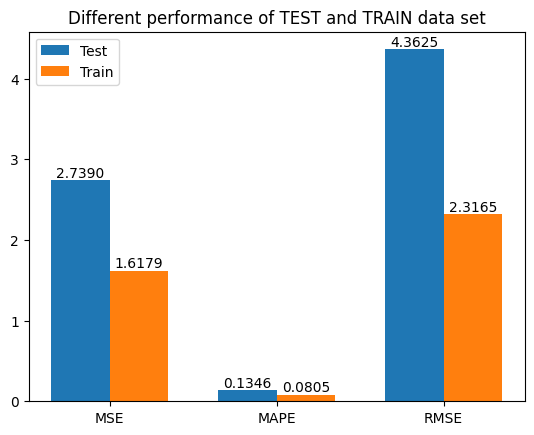

In [8]:
# Get MAE, MAPE and RMSE by sklearn.metrics
test_predictions = model.predict(test_x_n)
test_mae = sklearn.metrics.mean_absolute_error(test_y, test_predictions)
test_mape = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions)
test_rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions))

test_predictions = model.predict(train_x_n)
train_mae = sklearn.metrics.mean_absolute_error(train_y, test_predictions)
train_mape = sklearn.metrics.mean_absolute_percentage_error(train_y, test_predictions)
train_rmse = np.sqrt(sklearn.metrics.mean_squared_error(train_y, test_predictions))

print('Test data set:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')
print('Train data set:')
print(f'MAE: {train_mae}, MAPE: {train_mape}, RMSE: {train_rmse}')

# Bar chart
x = range(3)
bar_width = 0.35
test_bars= plt.bar(x, [test_mae, test_mape, test_rmse], bar_width, label='Test')
train_bars = plt.bar([i + bar_width for i in x], [train_mae, train_mape, train_rmse], bar_width, label='Train')
plt.xticks([i + bar_width / 2 for i in x], ['MSE', 'MAPE', 'RMSE'])
plt.bar_label(train_bars, fmt='%.4f')
plt.bar_label(test_bars, fmt='%.4f')
plt.title('Different performance of TEST and TRAIN data set')
plt.legend()
plt.show()

In [9]:
df = pd.DataFrame.from_dict({'Test': [test_mae, test_mape, test_rmse], 'Train': [train_mae, train_mape, train_rmse]})
df.index = ['MAE', 'MAPE', 'RMSE']
df.to_csv(os.path.join('HW1_2', 'Test_Train_performance.csv'))
df

,Test,Train
MAE,2.739036,1.617892
MAPE,0.134595,0.080467
RMSE,4.362524,2.316469


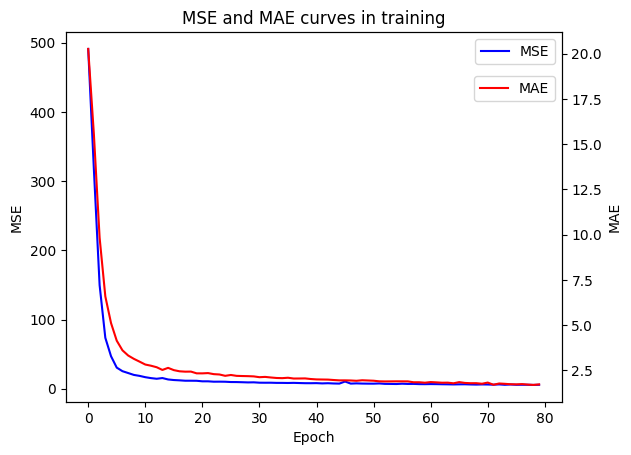

In [10]:
# Write accuracy and loss curves

fig, ax_a = plt.subplots()
ax_l = ax_a.twinx()

ax_a.plot(train_history.history['loss'], 'b-', label='MSE')
ax_a.set_xlabel('Epoch')
ax_a.set_ylabel('MSE')

ax_l.plot(train_history.history['mae'], 'r-', label='MAE')
ax_l.set_ylabel('MAE')

ax_a.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
ax_l.legend(loc='best', bbox_to_anchor=(1.0, 0.9))

plt.title('MSE and MAE curves in training')

plt.show()

In [11]:
df = pd.DataFrame.from_dict({'MSE': train_history.history['loss'], 'MAE': train_history.history['mae']})
df.to_csv(os.path.join('HW1_2', 'MSE_MAE_curves.csv'))
df

,MSE,MAE
0,491.024139,20.262238
1,316.167114,15.525256
2,149.690948,9.827497
3,73.636345,6.583931
4,47.013626,5.109348
...,...,...
75,5.735622,1.720917
76,5.803371,1.735859
77,5.768516,1.708946
78,5.564333,1.690260


# Impact of Data Normalization (a)

In [12]:
model_a = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model_a.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

train_history_a = model_a.fit(train_x, train_y, epochs=80, batch_size=16)

Epoch 1/80


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 589.5656 - mae: 15.7141 
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 147.8067 - mae: 9.2794 
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97.2329 - mae: 7.3925  
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122.9539 - mae: 8.0129  
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.8948 - mae: 8.0681 
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.9319 - mae: 6.6881
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.4245 - mae: 7.1131
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.4685 - mae: 6.8181
Epoch 9/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.5216 - mae: 6.9614
Epoch 10/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.3935 - mae: 7.2604 
Epoch 11/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.5389 - mae: 6.7804  
Epoch 12/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.5130 - mae: 6.7086 
Epoch 13/80
26/26 ━━━━━━━━━━━━━━

In [13]:
print('Test data set:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')

test_predictions_a = model.predict(test_x)
train_mae_a = sklearn.metrics.mean_absolute_error(test_y, test_predictions_a)
train_mape_a = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_a)
train_rmse_a = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_a))

print('With Normalization:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')
print('Without Normalizatio:')
print(f'MAE: {train_mae_a}, MAPE: {train_mape_a}, RMSE: {train_rmse_a}')

Test data set:
MAE: 2.7390362094430363, MAPE: 0.13459480680324157, RMSE: 4.362524372198423
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
With Normalization:
MAE: 2.7390362094430363, MAPE: 0.13459480680324157, RMSE: 4.362524372198423
Without Normalizatio:
MAE: 1976.8128147499235, MAPE: 108.68722033953874, RMSE: 2014.4493471259948


In [15]:
df = pd.DataFrame.from_dict(
    {'with normalizaion': train_history.history['loss'],
     'without normalizaion': train_history_a.history['loss']}
    )
df.to_csv(os.path.join('HW1_2', 'MSE_with_without_normalization.csv'))
df

,with normalizaion,without normalizaion
0,491.024139,223.565247
1,316.167114,114.560585
2,149.690948,93.174316
3,73.636345,97.379601
4,47.013626,90.218559
...,...,...
75,5.735622,24.603971
76,5.803371,27.622021
77,5.768516,21.961149
78,5.564333,29.611259


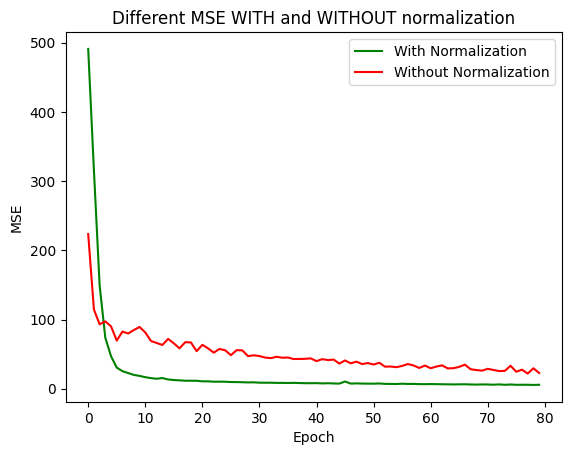

In [14]:
# Write accuracy and loss curves

plt.plot(train_history.history['loss'], 'g-', label='With Normalization',)
plt.plot(train_history_a.history['loss'], 'r-', label='Without Normalization')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='best')

plt.title('Different MSE WITH and WITHOUT normalization')

plt.show()

### 資料是否做正規化處理(z-score)的差別：
資料做正規化處理後，收斂數度更快，並且減少跳躍的情況

# Hidden layer unit number (b)

In [16]:
result_unit_num = []
result_mae = []

for i in range(16):
    unit_num = 16*(i+1)
    model_b = keras.Sequential([
        keras.layers.Dense(unit_num, activation='relu'),
        keras.layers.Dense(unit_num, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_b.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {unit_num} units...', end='\r')
    train_history_b = model_b.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_b = model_b.predict(test_x_n)
    test_mae_b = sklearn.metrics.mean_absolute_error(test_y, test_predictions_b)
    result_unit_num.append(unit_num)
    result_mae.append(test_mae_b)
    print(f'Model with {unit_num} units\'s MAE: {test_mae_b}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model with 16 units's MAE: 3.18825888820723
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/stepWARNING:tensorflow:5 out of the last 29 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000017EACCD4FE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model with 32 units's MAE: 2.8011076263352934
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model with 48 units's MAE: 2.546

In [18]:
df = pd.DataFrame(result_mae, index=result_unit_num, columns=['MAE'])
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_units.csv'))
df

,MAE
16,3.188259
32,2.801108
48,2.546895
64,2.587019
80,2.589830
96,2.544489
112,2.812992
128,2.593122
144,2.440172
160,2.598901


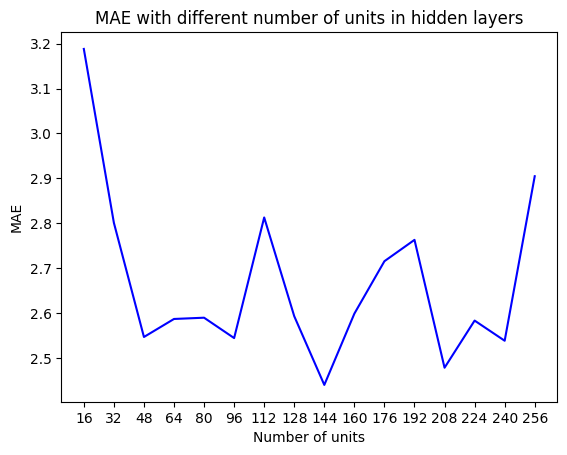

In [17]:
plt.plot(result_unit_num, result_mae, 'b-')
plt.xlabel('Number of units')
plt.ylabel('MAE')
plt.xticks(result_unit_num)
plt.title('MAE with different number of units in hidden layers')
plt.show()

### 隱藏層節點數量對模型的影響:
雖然沒有太大差異，但120到160之間是比較建議的節點數量

# Activation function (c)

LeakyReLU 參考資料: [Data Science - How to use LeakyRelu as activation function in sequence DNN in keras?When it perfoms better than Relu?](https://datascience.stackexchange.com/questions/39042/how-to-use-leakyrelu-as-activation-function-in-sequence-dnn-in-keraswhen-it-per)

In [19]:
activation_functions = ['linear', 'relu', 'leakyreLU', 'sigmoid', 'tanh', 'gelu', 'softplus', 'mish', 'swish']
result_mae = []

for activation_function in activation_functions:
    if activation_function == 'leakyreLU':
        act = keras.layers.LeakyReLU(alpha=0.03)
    else:
        act = activation_function
    model_c = keras.Sequential([
        keras.layers.Dense(64, activation=act),
        keras.layers.Dense(64, activation=act),
        keras.layers.Dense(1)
    ])
    model_c.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {activation_function} activation function...', end='\r')
    train_history_c = model_c.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_c = model_c.predict(test_x_n)
    test_mae_c = sklearn.metrics.mean_absolute_error(test_y, test_predictions_c)
    result_mae.append(test_mae_c)
    print(f'Model with {activation_function} activation function\'s MAE: {test_mae_c}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model with linear activation function's MAE: 3.533315506168441
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model with relu activation function's MAE: 2.659694815616982


d:\Development\3313_Machine_Learning\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model with leakyreLU activation function's MAE: 2.55926048708897
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with sigmoid activation function's MAE: 3.2111849167767703
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model with tanh activation function's MAE: 2.3283460140228276
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model with gelu activation function's MAE: 2.5648343656577315
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Model with softplus activation function's MAE: 3.1029966728360048
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model with mish activation function's MAE: 2.4127517307505895
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model with swish activation function's MAE: 2.8252171460319966


In [21]:
df = pd.DataFrame(result_mae, index=activation_functions, columns=['MAE'])
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_activation_functions.csv'))
df

,MAE
linear,3.533316
relu,2.659695
leakyreLU,2.559260
sigmoid,3.211185
tanh,2.328346
gelu,2.564834
softplus,3.102997
mish,2.412752
swish,2.825217


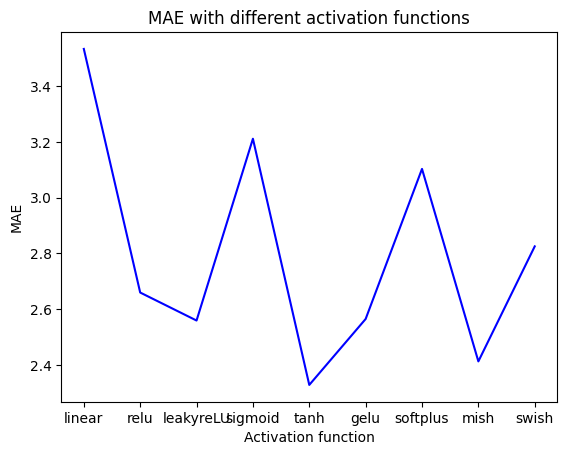

In [20]:
plt.plot(activation_functions, result_mae, 'b-')
plt.xlabel('Activation function')
plt.ylabel('MAE')
plt.xticks(activation_functions)
plt.title('MAE with different activation functions')
plt.show()

### 隱藏層激活函數 (Activation Functions) 的選擇對模型的影響
激活函數在這次實驗表現最好的是`mish`，是`relu`的變體。

# Optimizer (d)

With momentum資料來源  
SGD: [Keras - SGD](https://keras.io/api/optimizers/sgd/)  
RMSprop: [RMSprop - SGD](https://keras.io/api/optimizers/rmsprop/)

In [23]:
optimizers = ['sgd', 'sgd wm', 'adagrad', 'rmsprop', 'rmsprop wm','adam']
result_mae = []

for optimizer in optimizers:
    model_d = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    if optimizer == 'sgd wm':
        opt = keras.optimizers.SGD(momentum=0.5)
    elif optimizer == 'rmsprop wm':
        opt = keras.optimizers.RMSprop(momentum=0.5)
    else:
        opt = optimizer
    model_d.compile(
        optimizer=opt,
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {optimizer} optimizer...', end='\r')
    train_history_d = model_d.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_d = model_d.predict(test_x_n)
    test_mae_d = sklearn.metrics.mean_absolute_error(test_y, test_predictions_d)
    result_mae.append(test_mae_d)
    print(f'Model with {optimizer} optimizer\'s MAE: {test_mae_d}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model with sgd optimizer's MAE: 2.8268977501813106
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with sgd wm optimizer's MAE: 6.526250652238434
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model with adagrad optimizer's MAE: 6.49138412475586
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model with rmsprop optimizer's MAE: 2.7542965299942916
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with rmsprop wm optimizer's MAE: 2.4899899566874786
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model with adam optimizer's MAE: 2.6628276385513003


In [24]:
df = pd.DataFrame.from_dict({'Optimizer': optimizers, 'MAE': result_mae})
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_optimizers.csv'))
df

,Optimizer,MAE
0,sgd,2.826898
1,sgd wm,6.526251
2,adagrad,6.491384
3,rmsprop,2.754297
4,rmsprop wm,2.489990
5,adam,2.662828


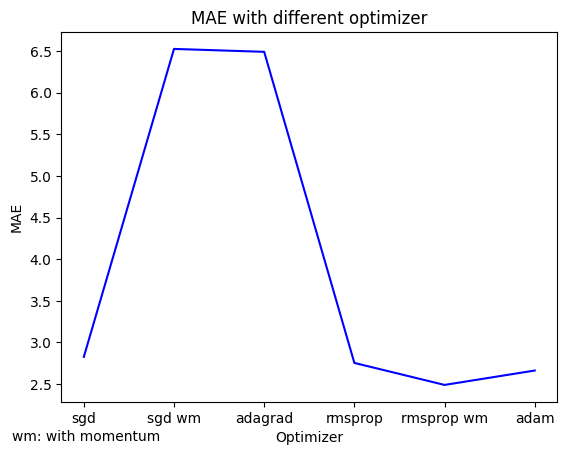

In [40]:
plt.plot(optimizers, result_mae, 'b-')
plt.xlabel('Optimizer')
plt.ylabel('MAE')
plt.xticks(optimizers)
plt.title('MAE with different optimizer')
plt.text(-0.8, 1.82, 'wm: with momentum')
plt.show()

本實驗表現最好的是有Monentum的`RMSprop`，常用的`Adam`也有不錯的表現

# Epoch (e)

In [41]:
result_epochs_num = []
result_test_mae = []
result_train_mae = []
result_times = []

for i in range(10):
    model_e = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_e.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    epochs = 100 * (i+1)
    print(f'Training model with {epochs} epochs...', end='\r')
    st = time.perf_counter()
    train_history_e = model_e.fit(train_x_n, train_y, epochs=epochs, batch_size=16, verbose=0)
    et = time.perf_counter()
    test_predictions_e = model_e.predict(test_x_n)
    train_predictions_e = model_e.predict(train_x_n)
    result_test_mae_e = sklearn.metrics.mean_absolute_error(test_y, test_predictions_e)
    result_train_mae_e = sklearn.metrics.mean_absolute_error(train_y, train_predictions_e)
    result_epochs_num.append(epochs)
    result_test_mae.append(result_test_mae_e)
    result_train_mae.append(result_train_mae_e)
    result_times.append(et - st)
    print(f'Model with {epochs} epochs\'s MAE: {result_test_mae_e} in {et - st} seconds')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 100 epochs's MAE: 2.6296335987016266 in 8.094437499996275 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 200 epochs's MAE: 2.343231637805116 in 15.245649599994067 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 300 epochs's MAE: 2.43954288445267 in 21.344923600001493 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 400 epochs's MAE: 2.574348966748107 in 28.822853899997426 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 500 epochs's MAE: 2.310879224889419 in 35.344421899993904 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 600 epochs's MAE: 2.7238790951523133 in 42.28772079999908 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

In [43]:
df = pd.DataFrame.from_dict({'Test': result_test_mae, 'Train': result_train_mae, 'Time':result_times})
df.index = result_epochs_num
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_epochs.csv'))
df

,Test,Train,Time
100,2.629634,1.489954,8.094437
200,2.343232,1.160360,15.245650
300,2.439543,0.898160,21.344924
400,2.574349,0.814642,28.822854
500,2.310879,0.796503,35.344422
600,2.723879,1.082515,42.287721
700,2.722935,0.877948,49.277302
800,2.649175,0.713150,56.046962
900,2.409987,0.574286,63.240121
1000,2.780825,0.429096,68.713814


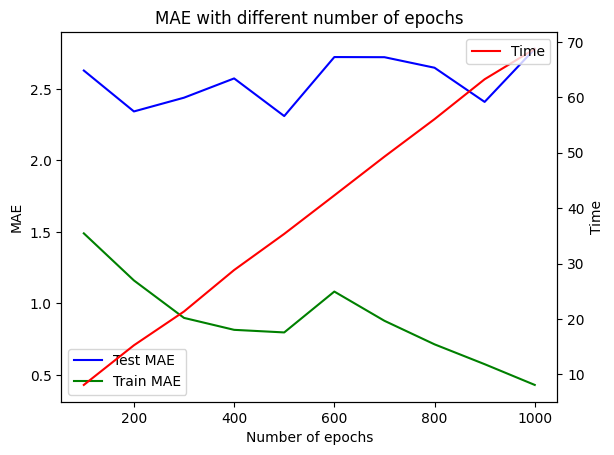

In [42]:
fig, ax_mae = plt.subplots()
ax_time = ax_mae.twinx()

ax_mae.plot(result_epochs_num, result_test_mae, 'b-', label='Test MAE')
ax_mae.plot(result_epochs_num, result_train_mae, 'g-', label='Train MAE')
ax_mae.set_xlabel('Number of epochs')
ax_mae.set_ylabel('MAE')
ax_mae.set_title('MAE with different number of epochs')
ax_mae.legend(loc='lower left')

ax_time.plot(result_epochs_num, result_times, 'r-', label='Time')
ax_time.set_ylabel('Time')
ax_time.legend(loc='upper right')
plt.show()

Epochs在到300以後，雖然Train資料集的MAE還有持續下降，但Test資料集下降的幅度已經很小了
建議的Epochs在300~400之間

# Batch size (f)

In [88]:
result_batch_num = []
result_train_history = []

for i in range(5):
    model_f = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_f.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )

    batch_size = 8 * (i+1)
    print(f'Training model with {batch_size} batch size...', end='\r')
    train_history_f = model_f.fit(train_x_n, train_y, epochs=80, batch_size=batch_size, verbose=0)
    result_batch_num.append(batch_size)
    result_train_history.append(train_history_f.history['loss'])
    print(f'Model with {batch_size} batch size\'s MAE: {train_history_f.history['mae'][-1]}')

Model with 8 batch size's MAE: 1.480631709098816
Model with 16 batch size's MAE: 1.60736882686615
Model with 24 batch size's MAE: 1.7551052570343018
Model with 32 batch size's MAE: 1.8878246545791626
Model with 40 batch size's MAE: 1.8654528856277466


In [89]:
df = pd.DataFrame.from_dict({'16': result_train_history[0], '32': result_train_history[1], '48': result_train_history[2], '64': result_train_history[3], '80': result_train_history[4]})
df.to_csv(os.path.join('HW1_2', 'MSE_with_different_batch_size.csv'))
df

,16,32,48,64,80
0,435.754913,490.067261,545.582947,534.778442,542.857483
1,151.419937,313.162903,439.268036,454.642548,475.242950
2,49.299839,137.563507,319.995941,367.304016,403.859741
3,34.865559,62.674919,201.367065,279.337708,371.154755
4,26.065727,36.908878,114.867744,194.149750,287.674408
...,...,...,...,...,...
75,4.698329,5.564193,6.359568,7.032787,6.732973
76,4.569956,5.367605,6.382960,7.010569,6.678879
77,4.568631,5.283864,6.402660,7.522264,6.766802
78,4.671828,5.218285,6.419575,7.003305,8.421488


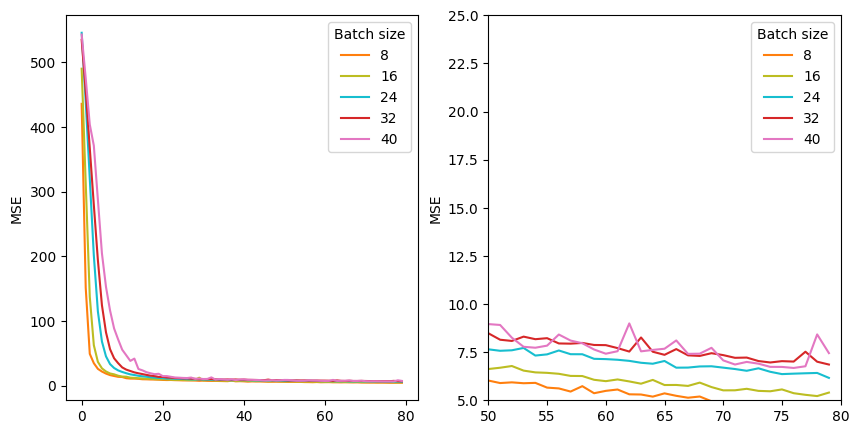

In [90]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
random_colors = np.random.choice(colors, size=5, replace=False)

for line, color, batch_size in zip(result_train_history, random_colors, result_batch_num):
    ax_1.plot(line, color=color, label=batch_size)
ax_1.legend(title='Batch size')
ax_1.set_ylabel('MSE')

for line, color, batch_size in zip(result_train_history, random_colors, result_batch_num):
    ax_2.plot(line, color=color, label=batch_size)
ax_2.set_ylim(5, 25)
ax_2.set_xlim(50, 80)
ax_2.legend(title='Batch size')
ax_2.set_ylabel('MSE')

plt.show()

本實驗結果batch=8的模型在收斂速度比較快，並在最後面的MSE也是相對較低的。  
較高的Batch size反而更不穩定。

# Number of Hidden layer (g)

In [99]:
result_train_history = []
result_times = []
result_params_num = []

for i in range(10):
    model_g = keras.Sequential()
    for j in range(i):
        model_g.add(keras.layers.Dense(32, activation='relu'))
    model_g.add(keras.layers.Dense(1))
    model_g.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {i+1} hidden layer...', end='\r')
    st = time.perf_counter()
    train_history_g = model_g.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    et = time.perf_counter()
    test_predictions_g = model_g.predict(test_x_n)
    result_train_history.append(train_history_g.history['loss'])
    result_times.append(et - st)
    result_params_num.append(model_g.count_params())
    print(f'Model with {i+1} hidden layer\'s MSE: {train_history_g.history['loss'][-1]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Model with 1 hidden layer's MSE: 458.4098815917969
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Model with 2 hidden layer's MSE: 9.823283195495605
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model with 3 hidden layer's MSE: 7.857605457305908
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model with 4 hidden layer's MSE: 6.064279556274414
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Model with 5 hidden layer's MSE: 4.522643566131592
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model with 6 hidden layer's MSE: 3.697413206100464
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Model with 7 hidden layer's MSE: 4.492029190063477
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Model with 8 hidden layer's MSE: 4.237903118133545
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Model with 9 hidden layer's MSE: 3.8120641708374023
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Model with 10 hidden layer's MSE: 4.056013584136963


In [102]:
df = pd.DataFrame.from_dict({
    '1': result_train_history[0],
    '2': result_train_history[1],
    '3': result_train_history[2],
    '4': result_train_history[3],
    '5': result_train_history[4],
    '6': result_train_history[5],
    '7': result_train_history[6],
    '8': result_train_history[7],
    '9': result_train_history[8],
    '10': result_train_history[9]})
df.to_csv(os.path.join('HW1_2', 'MSE_with_different_hidden_layers.csv'))
df

,1,2,3,4,5,6,7,8,9,10
0,620.781128,569.814026,529.875061,567.624878,517.328552,436.339142,535.481384,487.070129,360.358124,370.540863
1,606.324585,514.126343,443.856964,454.235352,272.277405,126.311035,190.162689,151.770889,65.054153,60.312950
2,620.039490,489.650879,347.151550,281.419220,68.393654,61.345833,46.858067,66.261147,41.914314,37.724472
3,593.704773,452.325134,232.198898,117.245895,39.858200,40.377174,35.627048,41.461662,29.823240,27.330421
4,593.967590,428.441040,146.185272,54.311947,31.659254,25.406809,28.985403,27.881163,23.812107,20.732054
...,...,...,...,...,...,...,...,...,...,...
75,465.616486,10.063069,7.912547,6.190570,4.613138,4.325006,4.435180,4.361256,4.929761,3.370251
76,461.487640,10.125246,7.652660,6.340313,4.283111,3.967345,4.766906,3.864159,4.444374,3.526218
77,470.773773,10.314676,8.177452,6.122391,4.372221,3.554876,4.677709,5.005944,3.943195,3.782150
78,456.102386,9.615790,7.735089,6.515817,4.645940,3.950274,4.422697,4.857615,4.694529,3.599893


Text(0.5, 1.0, 'Time & num of parameters with different num of layers')

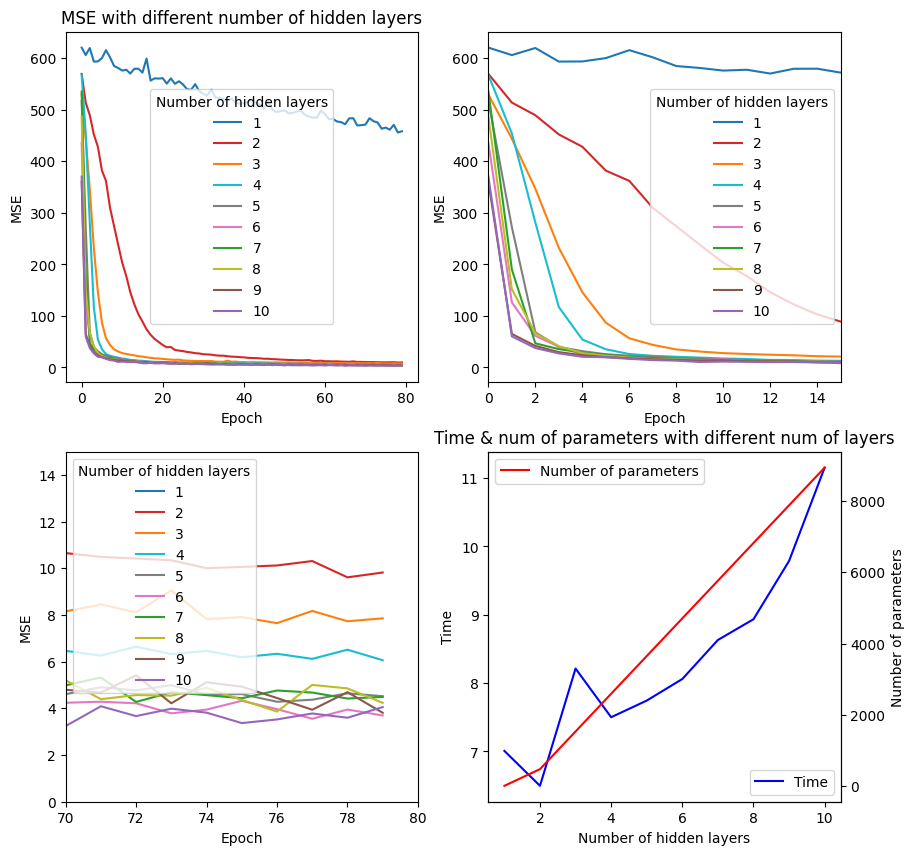

: 

In [115]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(10, 10))

random_colors = np.random.choice(colors, size=10, replace=False)

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_1.plot(line, color=color, label=layers)
ax_1.legend(title='Number of hidden layers')
ax_1.set_ylabel('MSE')
ax_1.set_xlabel('Epoch')
ax_1.set_title('MSE with different number of hidden layers')

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_2.plot(line, color=color, label=layers)
ax_2.legend(title='Number of hidden layers')
ax_2.set_ylabel('MSE')
ax_2.set_xlabel('Epoch')
ax_2.set_xlim(0, 15)

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_3.plot(line, color=color, label=layers)
ax_3.legend(title='Number of hidden layers', loc='upper left')
ax_3.set_ylabel('MSE')
ax_3.set_xlabel('Epoch')
ax_3.set_ylim(0, 15)
ax_3.set_xlim(70, 80)

ax_4.plot(range(1,11), result_times, 'b-')
ax_5 = ax_4.twinx()
ax_5.plot(range(1,11), result_params_num, 'r-')
ax_4.set_ylabel('Time')
ax_5.set_ylabel('Number of parameters')
ax_4.set_xlabel('Number of hidden layers')
ax_4.legend(['Time'], loc='lower right')
ax_5.legend(['Number of parameters'], loc='upper left')
ax_4.set_title('Time & num of parameters with different num of layers')

### 隱藏層層數對模型的影響

在每層隱藏層節點都是16個，隱藏層在1、2層時，收斂情況較差，尤其是1層無法收斂。
3層以上模型性能有叫明顯的改善，5層以後差異不大，但參數量會對執行時間造成影響。